# ⚡️study by 석민⚡️

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
os.getcwd()

'/Users/seokminlee/Desktop/mose/zero-base/스터디노트/5주차'

# 구별 데이터로 변경하기

In [22]:
crime_anal_station = pd.read_csv(
    "../ds_study/unit2/data/02. crime_in_Seoul_raw.csv", 
    index_col = 0, encoding = "utf-8")
crime_anal_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
구분,,,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637388,127.027324
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,양천구,37.539783,126.829997
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474379,126.950975


In [23]:
crime_anal_gu = pd.pivot_table(crime_anal_station, index = "구별", aggfunc = np.sum)
del crime_anal_gu["lat"]
del crime_anal_gu["lng"]

In [24]:
crime_anal_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
관악구,407.0,497.0,17.0,19.0,13.0,12.0,1591.0,3367.0,4653.0,5428.0
광진구,234.0,279.0,6.0,11.0,4.0,4.0,1057.0,2636.0,2011.0,2392.0


### 📍 df.div( )
- Pandas의 div() 함수는 DataFrame 또는 Series에서 요소 간 나눗셈 연산을 수행합니다. 
- 이 함수는 두 개의 DataFrame, Series, 또는 단일 숫자 간에 요소 단위의 나눗셈을 가능하게 합니다.
~~~python
df.div(other, axis='columns', level=None, fill_value=None)
~~~
>- other: 다른 DataFrame, Series, 또는 scalar 값과 나누기를 수행합니다.
>- axis: 연산을 적용할 축을 지정합니다. 'index'(또는 0)는 수직 연산을, 'columns'(또는 1)는 수평 연산을 나타냅니다.
>- level: MultiIndex의 경우, 레벨에 따라 연산을 적용하려면 레벨을 지정합니다.
>- fill_value: NaN 값을 대체하기 위한 값입니다.

In [9]:
# 강도 검거율
crime_anal_gu["강도검거"] / crime_anal_gu["강도발생"]

구별
강남구     1.076923
강동구     0.928571
강북구     0.800000
관악구     0.894737
광진구     0.545455
구로구     1.300000
노원구     1.500000
도봉구     1.000000
동대문구    1.200000
동작구     1.000000
마포구     1.750000
서대문구    0.800000
서초구     0.769231
성동구     1.666667
성북구     1.000000
송파구     0.800000
양천구     1.000000
영등포구    0.736842
용산구     1.111111
은평구     0.777778
종로구     0.750000
중구      0.875000
중랑구     1.000000
dtype: float64

In [11]:
crime_anal_gu[["강도검거", "살인검거"]].div(crime_anal_gu["강도발생"], axis = 0)

,강도검거,살인검거
구별,,
강남구,1.076923,0.128205
강동구,0.928571,0.357143
강북구,0.800000,1.200000
관악구,0.894737,0.684211
광진구,0.545455,0.363636
구로구,1.300000,0.900000
노원구,1.500000,1.000000
도봉구,1.000000,0.600000
동대문구,1.200000,0.500000


In [25]:
# 검거율 넣기
target = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
num = ["강간검거", "강도검거", "살인검거", "절도검거", "폭력검거"]
den = ["강간발생", "강도발생", "살인발생", "절도발생", "폭력발생"]

crime_anal_gu[target] = crime_anal_gu[num].div(crime_anal_gu[den].values) * 100

In [26]:
crime_anal_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,407.0,497.0,17.0,19.0,13.0,12.0,1591.0,3367.0,4653.0,5428.0,81.891348,89.473684,108.333333,47.252747,85.722181
광진구,234.0,279.0,6.0,11.0,4.0,4.0,1057.0,2636.0,2011.0,2392.0,83.870968,54.545455,100.000000,40.098634,84.071906


In [27]:
# 불 필요한 index 삭제
del crime_anal_gu["강간검거"]
del crime_anal_gu["강도검거"]
del crime_anal_gu["살인검거"]
del crime_anal_gu["절도검거"]
del crime_anal_gu["폭력검거"]

In [28]:
crime_anal_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,497.0,19.0,12.0,3367.0,5428.0,81.891348,89.473684,108.333333,47.252747,85.722181
광진구,279.0,11.0,4.0,2636.0,2392.0,83.870968,54.545455,100.000000,40.098634,84.071906


In [29]:
crime_anal_gu.rename(columns = {"강간발생": "강간",
                               "강도발생": "강도","살인발생": "살인",
                                "절도발생": "절도","폭력발생": "폭력",}, inplace = True)
crime_anal_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,497.0,19.0,12.0,3367.0,5428.0,81.891348,89.473684,108.333333,47.252747,85.722181
광진구,279.0,11.0,4.0,2636.0,2392.0,83.870968,54.545455,100.000000,40.098634,84.071906


In [31]:
crime_anal_gu[crime_anal_gu[target] > 100] = 100

In [32]:
crime_anal_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,497.0,19.0,12.0,3367.0,5428.0,81.891348,89.473684,100.000000,47.252747,85.722181
광진구,279.0,11.0,4.0,2636.0,2392.0,83.870968,54.545455,100.000000,40.098634,84.071906


# 서울시 범죄현황 데이터 최종 정리

In [33]:
# 정규화
# 본래의 DataFrame은 두고, 정규화된 데이터를 따로 만들자
# 최고값을 1로 두고, 최소값을 0으로
col = ["강간", "강도", "살인", "절도", "폭력"]
crime_anal_norm = crime_anal_gu[col] / crime_anal_gu[col].max()
crime_anal_norm.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,1.000000,0.357143,0.977118,0.733773
강동구,0.310078,0.358974,0.285714,0.477799,0.463880
강북구,0.420543,0.128205,0.500000,0.332879,0.509351
관악구,0.963178,0.487179,0.857143,0.917189,0.995233
광진구,0.540698,0.282051,0.285714,0.718060,0.438577


In [34]:
col2 = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"] 
crime_anal_norm[col2] = crime_anal_gu[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,1.000000,0.357143,0.977118,0.733773,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,0.310078,0.358974,0.285714,0.477799,0.463880,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,0.420543,0.128205,0.500000,0.332879,0.509351,73.271889,80.000000,85.714286,54.991817,89.344852
관악구,0.963178,0.487179,0.857143,0.917189,0.995233,81.891348,89.473684,100.000000,47.252747,85.722181
광진구,0.540698,0.282051,0.285714,0.718060,0.438577,83.870968,54.545455,100.000000,40.098634,84.071906


In [35]:
CCTV_result = pd.read_csv("../ds_study/unit1/data/01. CCTV_result.csv", 
            encoding = "utf-8", index_col = "구별")
crime_anal_norm[["인구수", "CCTV"]] = CCTV_result[["인구수", "소계"]]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,1.000000,0.357143,0.977118,0.733773,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238
강동구,0.310078,0.358974,0.285714,0.477799,0.463880,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010
강북구,0.420543,0.128205,0.500000,0.332879,0.509351,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831
관악구,0.963178,0.487179,0.857143,0.917189,0.995233,81.891348,89.473684,100.000000,47.252747,85.722181,520929,2109
광진구,0.540698,0.282051,0.285714,0.718060,0.438577,83.870968,54.545455,100.000000,40.098634,84.071906,372298,878


In [37]:
col = ["강간", "강도", "살인", "절도", "폭력"]
crime_anal_norm["범죄"] = np.mean(crime_anal_norm[col], axis = 1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.357143,0.977118,0.733773,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238,0.813607
강동구,0.310078,0.358974,0.285714,0.477799,0.463880,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010,0.379289
강북구,0.420543,0.128205,0.500000,0.332879,0.509351,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831,0.378196
관악구,0.963178,0.487179,0.857143,0.917189,0.995233,81.891348,89.473684,100.000000,47.252747,85.722181,520929,2109,0.843984
광진구,0.540698,0.282051,0.285714,0.718060,0.438577,83.870968,54.545455,100.000000,40.098634,84.071906,372298,878,0.453020


In [39]:
col2 = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"] 
crime_anal_norm["검거"] = np.mean(crime_anal_norm[col2], axis = 1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.357143,0.977118,0.733773,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238,0.813607,84.328112
강동구,0.310078,0.358974,0.285714,0.477799,0.463880,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010,0.379289,85.255701
강북구,0.420543,0.128205,0.500000,0.332879,0.509351,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831,0.378196,76.664569
관악구,0.963178,0.487179,0.857143,0.917189,0.995233,81.891348,89.473684,100.000000,47.252747,85.722181,520929,2109,0.843984,80.867992
광진구,0.540698,0.282051,0.285714,0.718060,0.438577,83.870968,54.545455,100.000000,40.098634,84.071906,372298,878,0.453020,72.517393


# Seaborn

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2 * np.sin(x + 0.5)
y3 = 3 * np.sin(x + 1.0)
y4 = 4 * np.sin(x + 1.5)

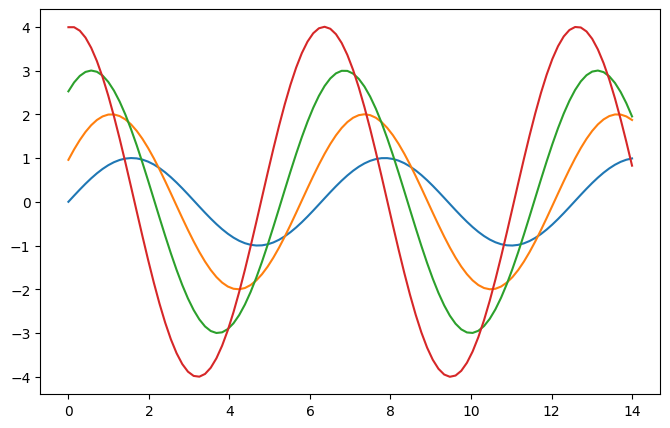

In [45]:
plt.figure(figsize = (8, 5))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

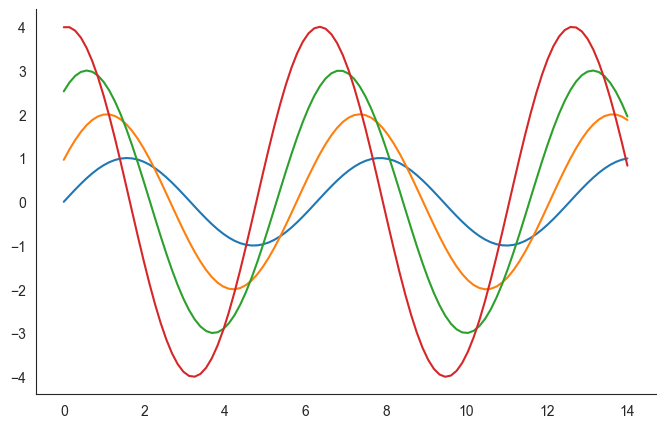

In [48]:
# white 스타일
sns.set_style("white")
plt.figure(figsize = (8, 5))
plt.plot(x, y1, x, y2, x, y3, x, y4)
sns.despine()
plt.show()

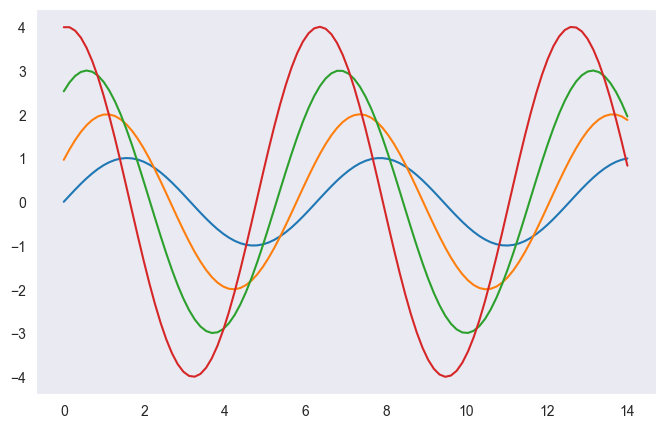

In [49]:
sns.set_style("dark")
plt.figure(figsize = (8, 5))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

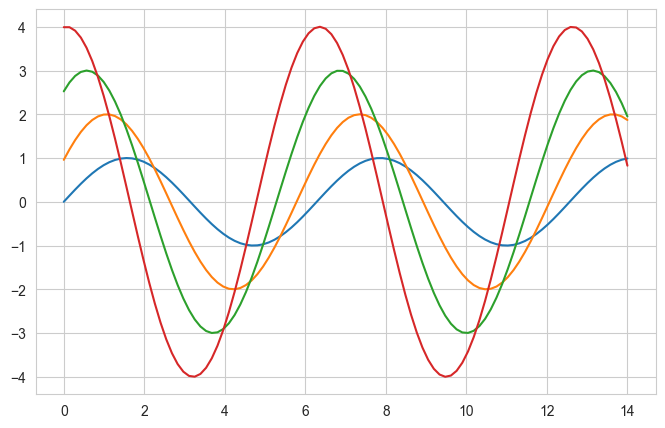

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize = (8, 5))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

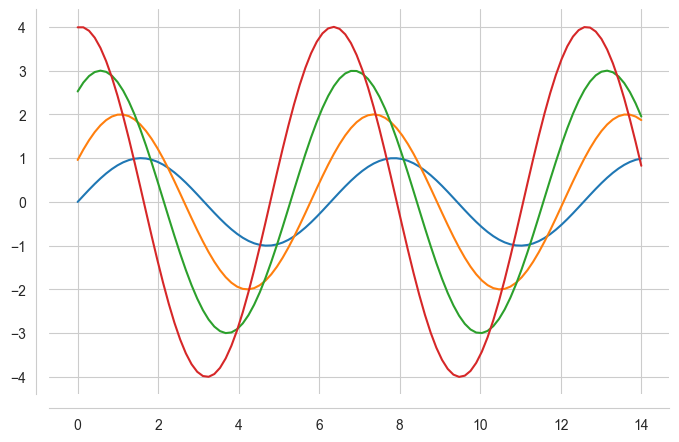

In [52]:
# despine 적용
plt.figure(figsize = (8, 5))
plt.plot(x, y1, x, y2, x, y3, x, y4)
sns.despine(offset = 10)
plt.show()

In [53]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 📍 sns.boxplot( )
- Seaborn은 matplotlib을 기반으로 하는 Python 데이터 시각화 라이브러리입니다. 
- 통계적 그래픽을 생성하는데 특화되어 있으며, 다양한 그래픽을 생성하는 강력한 함수들을 제공합니다.
- boxplot() 함수는 Seaborn 라이브러리에서 제공하는 함수 중 하나로, 박스 플롯(또는 상자 수염 그림)을 생성하는 데 사용됩니다. 
- 박스 플롯은 데이터의 중앙값, 사분위수, 이상치 등을 한눈에 파악하기 좋게 나타내 줍니다.
~~~python
seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, 
                orient=None, color=None, palette=None, saturation=0.75, 
                width=0.8, dodge=True, fliersize=5, linewidth=None, 
                whis=1.5, ax=None, **kwargs)
~~~
>- x, y, hue: 데이터셋의 변수를 지정합니다. 데이터를 분할하는 데 사용됩니다. x와 y는 각각 x축과 y축에 대응하는 데이터, hue는 데이터의 하위 그룹을 구분하는 데 사용됩니다.
>- data: 입력 데이터를 지정합니다. 일반적으로 pandas DataFrame을 사용합니다.
>- order, hue_order: 입력된 순서에 따라 범주형 변수의 레벨을 그립니다.
>- orient: 박스 플롯의 방향을 결정합니다('v' 또는 'h'). 대부분의 경우 자동으로 추론되지만, 단일 변수를 그릴 때는 필요합니다.
>- color, palette: 박스 플롯의 색상을 지정합니다. color는 모든 요소에 대해 동일한 색상을 지정하고, palette는 다양한 색상을 지정합니다.
>- width: 박스의 너비를 결정합니다.
>- dodge: hue 변수가 있을 때, 박스를 분리할지 여부를 결정합니다.
>- fliersize: 이상치의 마커 크기를 결정합니다.
>- linewidth: 라인의 너비를 결정합니다.
>- whis: 이상치를 결정하는 비율이나 범위를 설정합니다. 기본적으로 1.5 IQR(Inter-Quartile Range, 사분범위)를 사용합니다.
>- ax: matplotlib의 축 객체를 지정합니다. 여러 개의 서브플롯을 그릴 때 유용합니다.

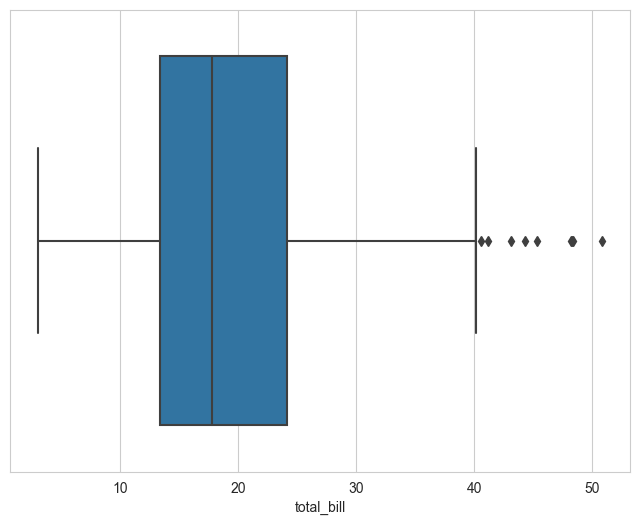

In [58]:
# boxplot
plt.figure(figsize = (8, 6))
sns.boxplot(x = tips["total_bill"])
plt.show()

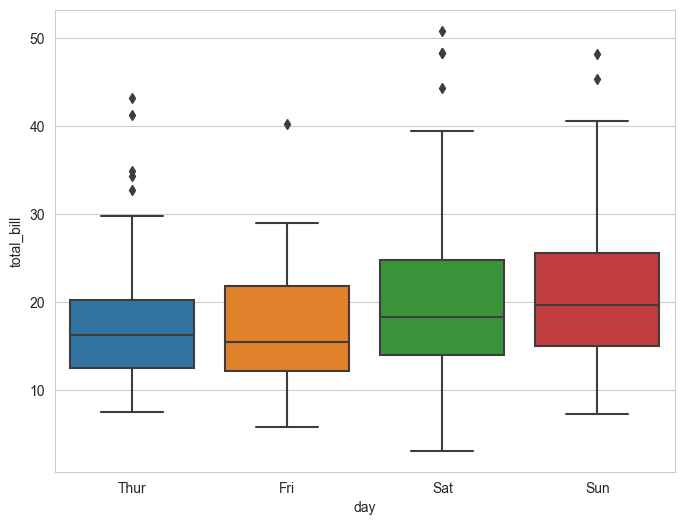

In [59]:
# boxplot에 컬럼을 지정
plt.figure(figsize = (8, 6))
sns.boxplot(x = "day", y = "total_bill", data = tips)
plt.show()

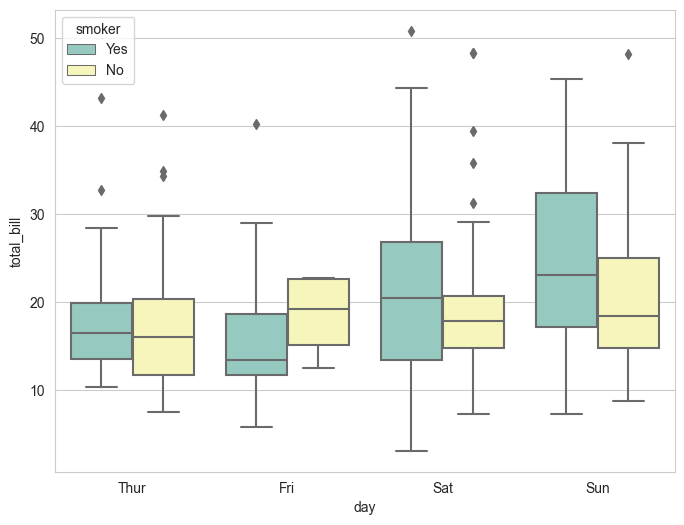

In [64]:
# 컬럼을 지정하고 구분을 지을 수 있다.
plt.figure(figsize = (8, 6))
sns.boxplot(x = "day", y = "total_bill", hue = "smoker", data = tips, palette = "Set3")
plt.show()

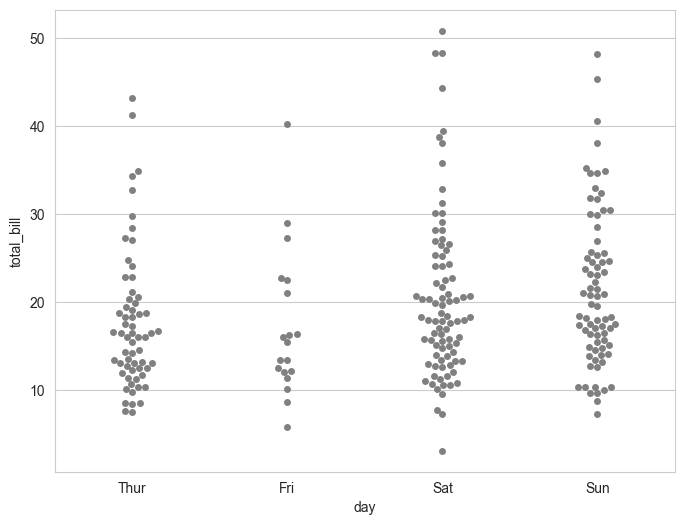

In [66]:
# swarmplot
plt.figure(figsize = (8, 6))
sns.swarmplot(x = "day", y = "total_bill", data = tips, color = ".5")
plt.show()

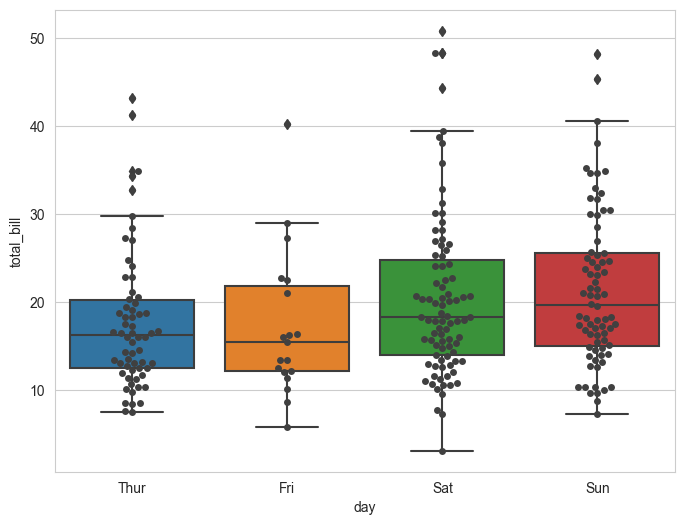

In [68]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = "day", y = "total_bill", data = tips)
sns.swarmplot(x = "day", y = "total_bill", data = tips, color = ".25")
plt.show()

### 📍 sns.lmplot( )
- Seaborn의 lmplot() 함수는 선형 회귀 모델을 만들고 이를 시각화하는 기능을 제공합니다.
- 이 함수는 2차원 산점도를 기반으로 하며, 그 위에 회귀 직선과 95% 신뢰 구간을 표시해줍니다.
~~~python
sns.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, 
           col_wrap=None, height=5, aspect=1, markers='o', sharex=True, 
           sharey=True, hue_order=None, col_order=None, row_order=None, 
           legend=True, legend_out=True, x_estimator=None, x_bins=None, 
           x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, 
           units=None, seed=None, order=1, logistic=False, lowess=False, 
           robust=False, logx=False, x_partial=None, y_partial=None, 
           truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, 
           line_kws=None)

~~~
>- x, y: 데이터셋의 변수를 지정합니다. x축과 y축에 대응하는 데이터입니다.
>- data: 입력 데이터를 지정합니다. 일반적으로 pandas DataFrame을 사용합니다.
>- hue, col, row: 데이터를 분할하는 데 사용되는 변수를 지정합니다. hue는 색상을 변경하여 하위 그룹을 구분하고, col과 row는 여러 서브플롯을 생성합니다.
>- palette: 색상 팔레트를 지정합니다.
>- height: 그래프의 높이를 지정합니다.
>- aspect: 각 개별 그래프의 가로/세로 비율을 지정합니다.
>- markers: 산점도의 마커 모양을 지정합니다.
>- fit_reg: 회귀선을 그릴지 여부를 결정합니다. 기본적으로 True입니다.
>- ci: 신뢰 구간을 그릴지, 그리고 어느 정도의 신뢰 구간을 그릴지 결정합니다.
>- order: 회귀 다항식의 차수를 결정합니다.
>- logistic, lowess, robust, logx: 다양한 종류의 회귀를 지정합니다. 기본적으로는 선형 회귀를 그립니다.
>- x_jitter, y_jitter: 점들의 위치를 약간 무작위로 바꾸어 데이터의 밀도를 나타내는 데 사용됩니다.

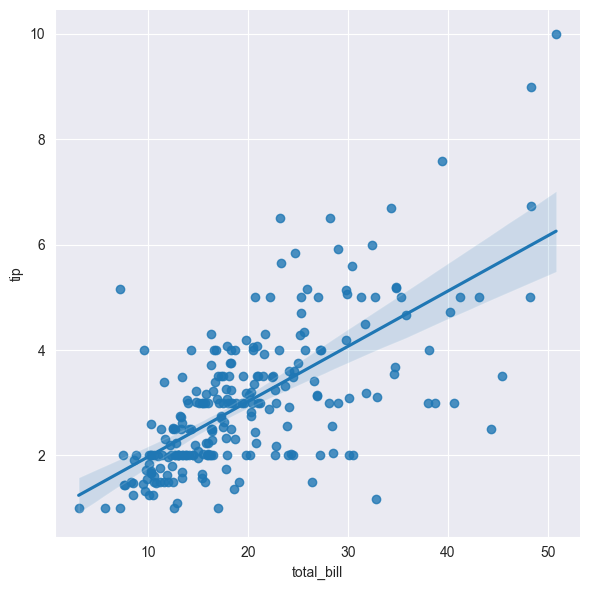

In [81]:
# total_bill 과 tip 사이의 관계 파악
sns.set_style("darkgrid")
sns.lmplot(x = "total_bill", y = "tip", data = tips, height = 6)
plt.show()

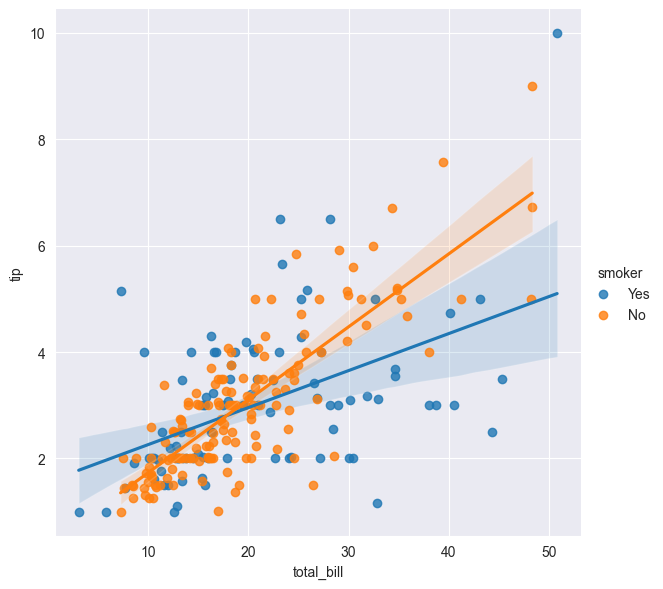

In [82]:
sns.set_style("darkgrid")
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "smoker", height = 6)
plt.show()

In [86]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [89]:
# pivot 옵션을 사용할 수도 있다.
flights = flights.pivot("month", "year", "passengers")
flights.head()

/var/folders/nc/lry6d8ws417_mblykm_8wpc40000gn/T/ipykernel_29401/762750721.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights.pivot("month", "year", "passengers")


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


### 📍sns.heatmap( )
- Seaborn의 heatmap( ) 함수는 데이터를 색상으로 인코딩한 2차원 (그래픽) 히트맵을 그리는 데 사용됩니다. 
- 이는 변수 간의 상관 관계나 2차원 데이터의 분포 패턴 등을 시각화하는데 매우 유용합니다.
~~~python
sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, 
            robust=False, annot=None, fmt='.2g', annot_kws=None, 
            linewidths=0, linecolor='white', cbar=True, cbar_kws=None, 
            cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', 
            mask=None, ax=None, **kwargs)
~~~
>- data: 히트맵으로 그릴 데이터셋을 지정합니다. 일반적으로 pandas DataFrame이나 numpy array를 사용합니다. 이 데이터는 2차원 형태여야 합니다.
>- vmin, vmax: 컬러맵의 최소, 최대값을 지정합니다.
>- cmap: 컬러맵을 지정합니다. Matplotlib의 컬러맵 이름이나 컬러 객체를 사용할 수 있습니다.
>- center: 컬러맵의 중심값을 지정합니다. 이 값이 주어지면 diverging 컬러맵을 사용하게 됩니다.
>- robust: 이 값이 True면, 데이터의 이상치를 무시하고 컬러맵을 계산합니다.
>- annot: 이 값이 True면, 각 셀에 값이 표시됩니다.
>- fmt: 셀에 표시되는 값의 포맷을 지정합니다.
>- linewidths: 셀 사이의 선의 너비를 지정합니다.
>- linecolor: 셀 사이의 선의 색상을 지정합니다.
>- cbar: 컬러 바의 표시 여부를 지정합니다.
>- cbar_kws: 컬러 바에 대한 추가 키워드 인수를 지정합니다.
>- square: 이 값이 True면, 각 셀이 정사각형이 됩니다.
>- mask: 이 값이 True인 위치는 히트맵에서 마스킹(데이터가 표시되지 않음)됩니다.
>- ax: matplotlib의 축 객체를 지정합니다. 여러 개의 서브플롯을 그릴 때 유용합니다.

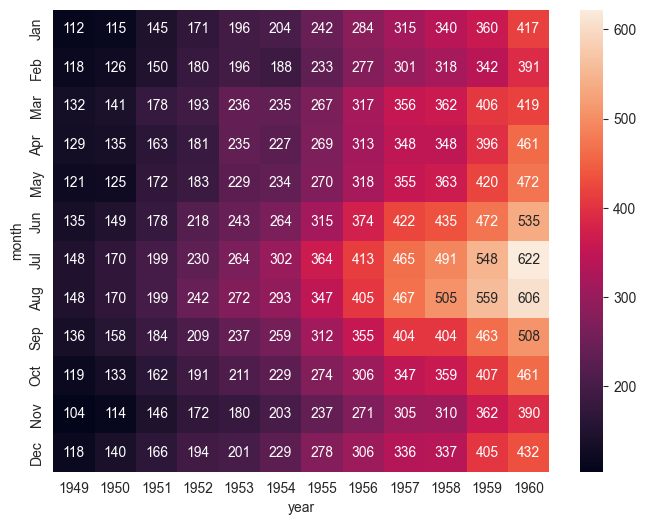

In [90]:
plt.figure(figsize = (8, 6))
sns.heatmap(flights, annot = True, fmt = "d")
plt.show()

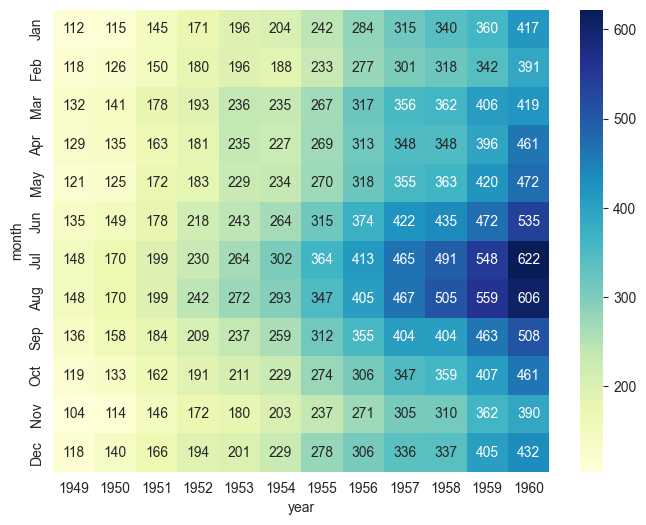

In [94]:
plt.figure(figsize = (8, 6))
sns.heatmap(flights, annot = True, fmt = "d", cmap = "YlGnBu")
plt.show()

In [95]:
sns.set(style = "ticks")
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


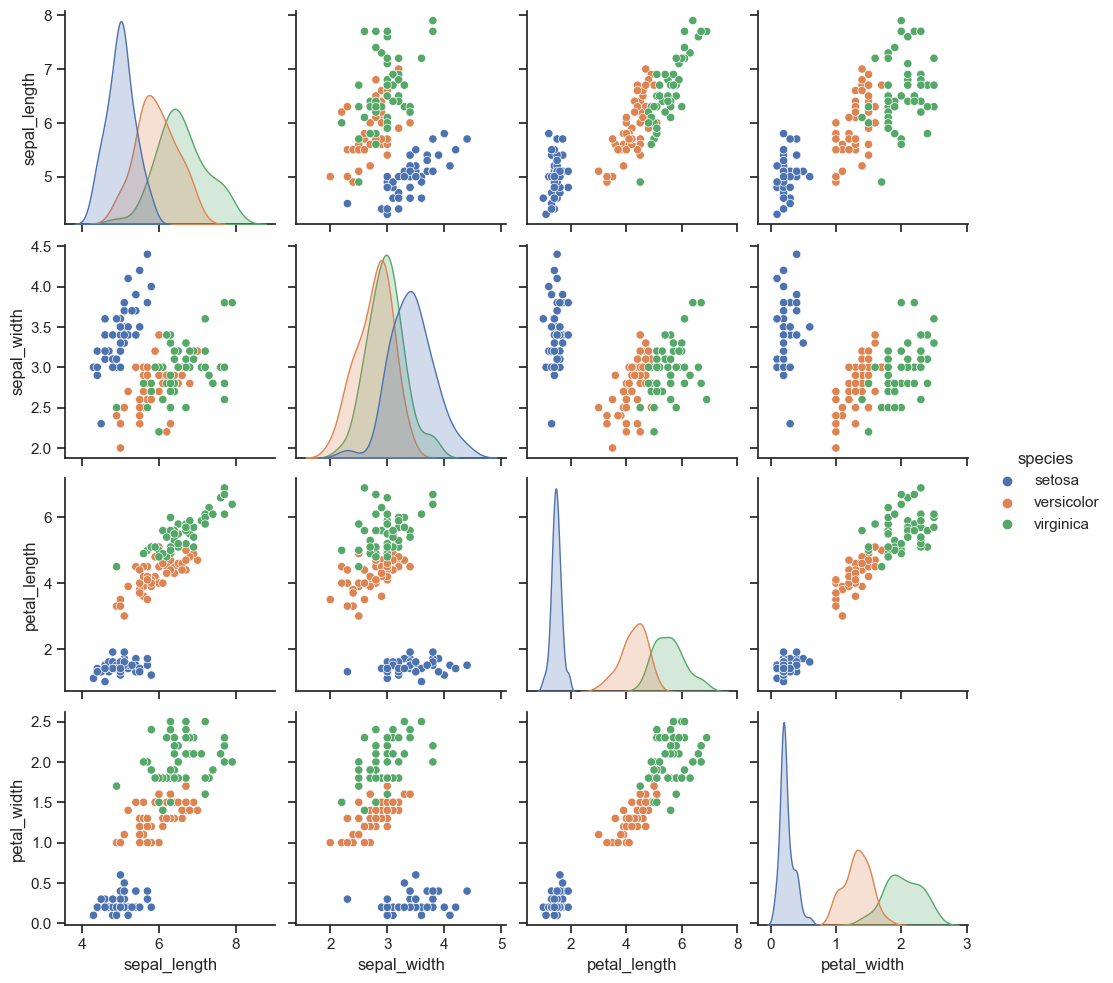

In [97]:
sns.pairplot(iris, hue = "species")
plt.show()

In [99]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Figure size 800x600 with 0 Axes>

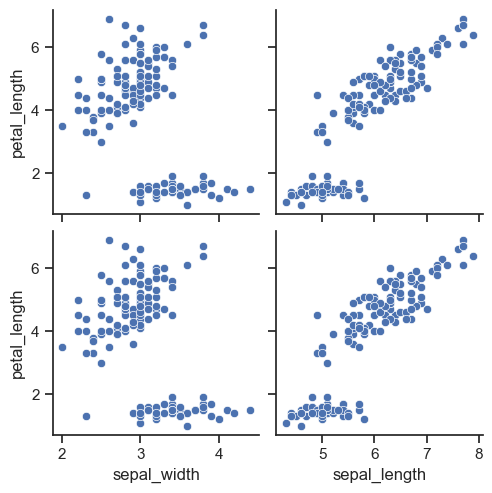

In [101]:
plt.figure(figsize = (8, 6))
sns.pairplot(iris, x_vars = ["sepal_width", "sepal_length"], y_vars = ["petal_length", "petal_length"])
plt.show()

In [102]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


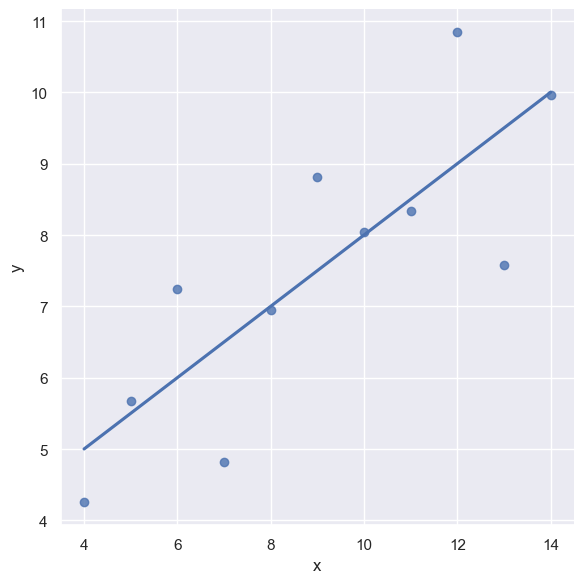

In [105]:
sns.set_style("darkgrid")
sns.lmplot(x = "x", y = "y", data = anscombe[anscombe.dataset == 'I'], ci = None, height = 6)
plt.show()

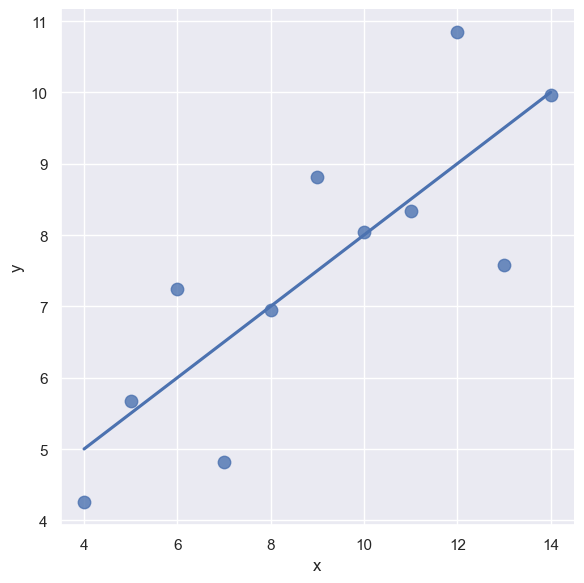

In [108]:
sns.set_style("darkgrid")
sns.lmplot(x = "x", y = "y", data = anscombe[anscombe.dataset == "I"],
           ci = None,
           scatter_kws = {"s": 80},
           height = 6)

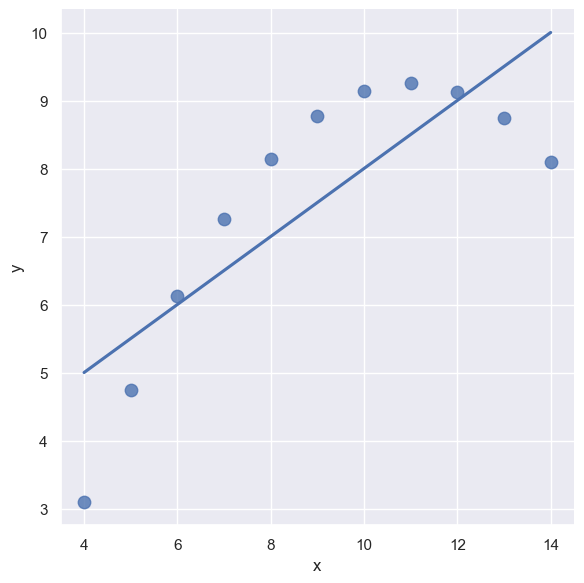

In [112]:
sns.set_style("darkgrid")
sns.lmplot(x = "x", y = "y", data = anscombe[anscombe.dataset == "II"],
           order = 1,
           ci = None,
           scatter_kws = {"s": 80},
           height = 6)

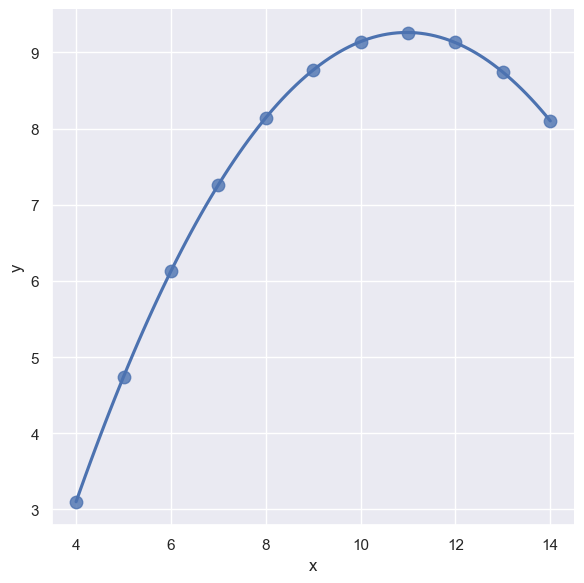

In [116]:
sns.set_style("darkgrid")
sns.lmplot(x = "x", y = "y", data = anscombe[anscombe.dataset == "II"],
           order = 2,
           ci = None,
           scatter_kws = {"s":80},
           height = 6)

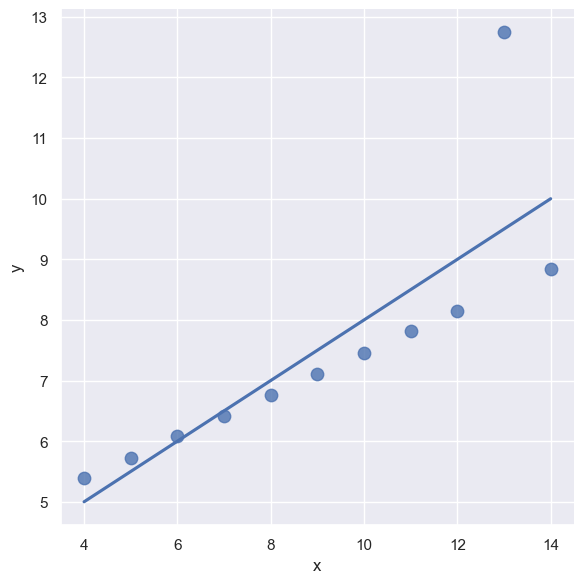

In [117]:
sns.set_style("darkgrid")
sns.lmplot(x = "x", y = "y", data = anscombe[anscombe.dataset == "III"],
           ci = None,
           scatter_kws = {"s":80},
           height = 6)